#  제2장

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

###한글 폰트###
rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [84]:
df = pd.read_csv('house_price1.csv')

In [85]:
df.head()

,Unnamed: 0,price,built_yr,dong_name,apt_name,size,gu_code,date_tr,size_pyung
0,0,150000,1988,방배동,방배임광,82.34,11650,2021-06-01,24.726727
1,1,155000,2003,방배동,삼환나띠르빌(1002-9),148.99,11650,2021-06-01,44.741742
2,2,290000,1983,방배동,방배신삼호,185.46,11650,2021-06-02,55.693694
3,3,210000,2006,방배동,롯데캐슬헤론,169.08,11650,2021-06-02,50.774775
4,4,175000,1992,방배동,대우(효령),84.91,11650,2021-06-02,25.498498


In [86]:
df = df.drop('Unnamed: 0', axis=1) # 1 column, 0 row

In [87]:
df['price_pyung'] = df['price']/df['size_pyung']

In [88]:
df1 = df.loc[df['dong_name'].isin(["잠원동"])]

In [115]:
df1.head()

,price,built_yr,dong_name,apt_name,size,gu_code,date_tr,size_pyung,price_pyung
66,197941,2000,잠원동,노블레스,152.01,11650,2021-06-01,45.648649,4336.185317
67,215000,2000,잠원동,노블레스,152.01,11650,2021-06-01,45.648649,4709.887507
68,163000,1985,잠원동,신반포27,53.46,11650,2021-06-01,16.054054,10153.198653
69,249000,1981,잠원동,신반포10,76.32,11650,2021-06-02,22.918919,10864.386792
70,249000,1981,잠원동,신반포10,76.32,11650,2021-06-02,22.918919,10864.386792


In [116]:
x = df1['price_pyung']

In [117]:
mu = np.mean(x)
sigma = np.std(x)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

In [118]:
mu

9711.226617759423

In [119]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

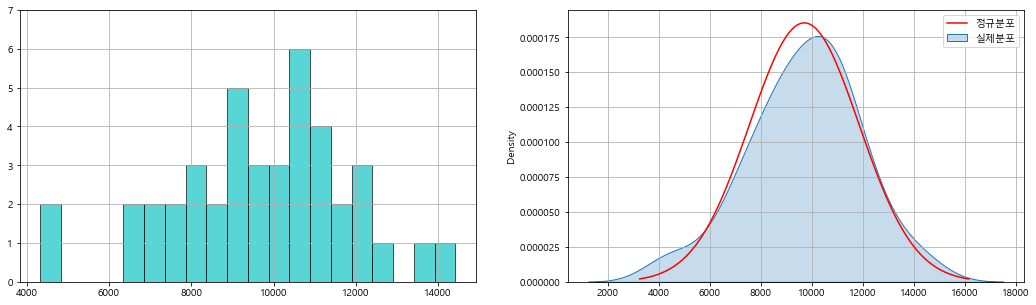

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

np.random.seed(6789)

ax[0].hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
ax[0].set_ylim(0, 7)
ax[0].grid()

x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.kdeplot(df1['price_pyung'], shade=True, label='실제분포', ax=ax[1]) 
ax[1].plot(x1, stats.norm.pdf(x1, mu, sigma), color='red', label="정규분포")

ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("")
plt.savefig("히스토그램_잠원동.png", dpi=150, bbox_inches='tight')
plt.show()

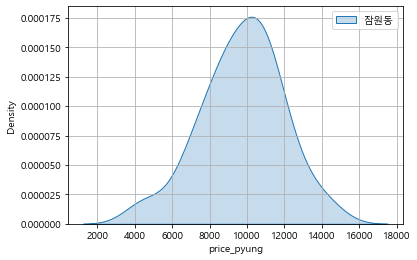

In [40]:
sns.kdeplot(df1['price_pyung'], shade=True, label='잠원동') 
plt.legend()
plt.grid()
plt.savefig("서초01.png", dpi=150, bbox_inches='tight')
plt.show()

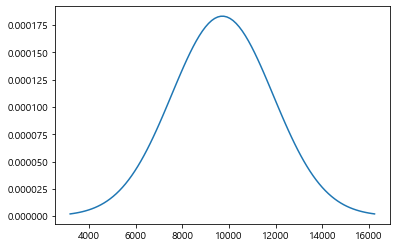

In [109]:
import scipy.stats as stats
import math

n = len(df1)
mu = df1['price_pyung'].mean()
sigma = df1['price_pyung'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
data = stats.norm.pdf(x, mu, sigma)
plt.plot(x, data)

#data = np.random.randn(n) * s + mu
#df2 = pd.DataFrame(data, columns={'price_pyung'})

In [110]:
mu

9711.226617759423

In [111]:
sigma

2178.2521620395955

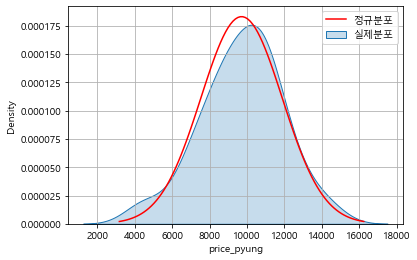

In [112]:
df1 = df.loc[df['dong_name'].isin(["잠원동"])]
df2 = pd.DataFrame(data, columns={'price_pyung'})
sns.kdeplot(df1['price_pyung'], shade=True, label='실제분포') 
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label="정규분포")
plt.legend()
plt.grid()
#plt.savefig("C:\HSCHUNG\PYTHON\B_CLASS\A_BigDataEconomics\C202101\png\W02_0309/pdf_서초02.png", dpi=150, bbox_inches='tight')
plt.show()

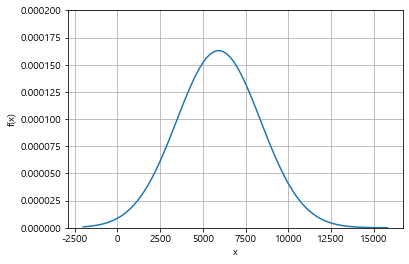

In [58]:
from scipy.stats import norm

fig, ax = plt.subplots()
x= np.arange(-2000,16000,200)
#ax.set_title('N(0,$2^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
ax.plot(x, norm.pdf(x, loc=mn, scale=se)) # 표준정규분포의 pdf
ax.set_ylim(0,0.0002)
plt.savefig("C:\HSCHUNG\PYTHON\B_CLASS\A_BigDataEconomics\C202101\png\W02_0309/pdf_서초02.png", dpi=150, bbox_inches='tight')
plt.show()